In [158]:
# import np, pd and matplotlib and seaborn
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

In [159]:
df = pd.read_csv(r"C:\ZTalJaZ\Storage\MasterOfDataScience\Data-Sources\EDA\surat_uncleaned.csv")

df.head(2)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac


# Load and Explore dataset

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [161]:
df.describe()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
count,4525,4525,4525,4421,4524,4480,4185,3936,3154,4157,4525
unique,1992,6,1399,38,138,222,78,176,2588,2134,841
top,3 BHK Apartment for Sale in Vesu Surat,Super Area,1000 sqft,Resale,Ready to Move,Resale,Unfurnished,East,Multistorey apartment is available for sale. I...,"₹5,000 per sqft",Call for Price
freq,93,2599,77,2197,3078,431,2322,1487,35,64,173


# Fix the data types of the columns in the dataset

In [162]:
# Check types of columns
df.dtypes

property_name     object
areaWithType      object
square_feet       object
transaction       object
status            object
floor             object
furnishing        object
facing            object
description       object
price_per_sqft    object
price             object
dtype: object

In [163]:
# Check for the number of unique values in the 'transaction' column
df['transaction'].nunique()

38

In [164]:
# DF for percentage of missing values
percentage = df.isnull().mean() * 100

percentage.sort_values(ascending=False)

description       30.298343
facing            13.016575
price_per_sqft     8.132597
furnishing         7.513812
transaction        2.298343
floor              0.994475
status             0.022099
square_feet        0.000000
areaWithType       0.000000
property_name      0.000000
price              0.000000
dtype: float64

In [165]:
# Create DF for that percentage
percentage_df = pd.DataFrame(data=[percentage.index, percentage.values]).T

percentage_df.columns = ["a", "b"]

percentage_df.sort_values(by="b", ascending=False)

,a,b
8,description,30.298343
7,facing,13.016575
9,price_per_sqft,8.132597
6,furnishing,7.513812
3,transaction,2.298343
5,floor,0.994475
4,status,0.022099
0,property_name,0.0
1,areaWithType,0.0
2,square_feet,0.0


In [166]:
# dropping column description because high percentage of missing value and it is texture column not doing anything
# axis = 1 because removing column
# drop column depend on each case

df = df.drop('description', axis=1)

In [167]:
# contains many inconsistent values
df = df.drop('status', axis=1)

In [168]:
df.head(2)

,property_name,areaWithType,square_feet,transaction,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac


In [169]:
df[['floor_num', 'total_floors']] = df['floor'].str.split(' out of ', expand = True)

df.head(2)

,property_name,areaWithType,square_feet,transaction,floor,furnishing,facing,price_per_sqft,price,floor_num,total_floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac,5,10
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac,6,14


In [170]:
df = df.dropna(subset=['floor_num', 'total_floors'])

In [171]:
df.head(2)

,property_name,areaWithType,square_feet,transaction,floor,furnishing,facing,price_per_sqft,price,floor_num,total_floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac,5,10
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac,6,14


In [172]:
df.loc[df['floor_num'] == 'Lower Basement', 'floor_num'] = '-2' 
df.loc[df['floor_num'] == 'Upper Basement', 'floor_num'] = '-1' 
df.loc[df['floor_num'] == 'Ground', 'floor_num'] = '0'

In [173]:
df.loc[:, 'floor_num']  = df['floor_num'].apply(lambda x: int(x) if x.isnumeric() else None)
df.loc[:, 'total_floors']  = df['total_floors'].apply(lambda x: int(x) if x.isnumeric() else None)

df = df.dropna(subset=['floor_num', 'total_floors'])
df=  df.drop('floor', axis=1)

df[['floor_num', 'total_floors']] = df[['floor_num', 'total_floors']].astype(int)

df.head(2)

,property_name,areaWithType,square_feet,transaction,furnishing,facing,price_per_sqft,price,floor_num,total_floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac,5,10
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac,6,14


In [174]:
df['furnishing'].value_counts()

furnishing
Unfurnished                2313
Semi-Furnished              488
Furnished                   453
1                            88
1 Covered                    24
2                            20
1 Open                       14
2 Covered                     8
3                             8
1 Covered,                    6
4                             5
2 Covered,                    5
2 Open                        4
100 Covered                   2
6                             2
> 10                          2
3 Covered                     2
26 Covered                    1
5 Covered,                    1
10 Open                       1
Vaishnodevi Ideal Homes       1
50 Covered,                   1
Vinayak Enclave               1
West                          1
50 Open                       1
5 Covered                     1
20 Open                       1
10 Covered,                   1
Name: count, dtype: int64

In [175]:
# Keep values that have more data that can effect the analysis (the majority of the dataset)
df = df[df['furnishing'].isin(['Unfurnished', 'Semi-Furnished', 'Furnished'])]

In [176]:
# handle the facing column
df['facing'].value_counts().index

# In this situation, if dropping many row the can cause removing the nessesary data then we can create new category name "Others" and store all other data

Index(['East', 'South -West', 'North - East', '2', '1', '3', 'North', 'West',
       'South - East', 'Main Road',
       ...
       'Atithi Western Oasis', 'Aagam Paramount', 'Cellestial Dreams',
       'Nandanvan III', 'Samarth Enclave', 'Happy Home Capital Greens',
       'Shaligram The Emerald', '135 X', '131 X', 'Vesu Point'],
      dtype='object', name='facing', length=147)

In [177]:
# or can drop that column
df = df.drop('facing', axis=1)

In [178]:
df.head(2)

,property_name,areaWithType,square_feet,transaction,furnishing,price_per_sqft,price,floor_num,total_floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Unfurnished,"₹2,891 per sqft",₹33.8 Lac,5,10
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Unfurnished,"₹3,551 per sqft",₹45.4 Lac,6,14


In [179]:
df = df.dropna(subset=['price_per_sqft'])

In [180]:
df['square_feet'] = df['square_feet'].apply(lambda x: int(x.split(' ')[0].replace(',','')))

In [181]:
df['price_in_lakhs'] = df['price'].apply(lambda x: float(x.split(' ')[0].replace('₹','')))

In [182]:
df.head(2)

,property_name,areaWithType,square_feet,transaction,furnishing,price_per_sqft,price,floor_num,total_floors,price_in_lakhs
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Unfurnished,"₹2,891 per sqft",₹33.8 Lac,5,10,33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Unfurnished,"₹3,551 per sqft",₹45.4 Lac,6,14,45.4


In [183]:
df = df.drop('price', axis=1)

# Visualization

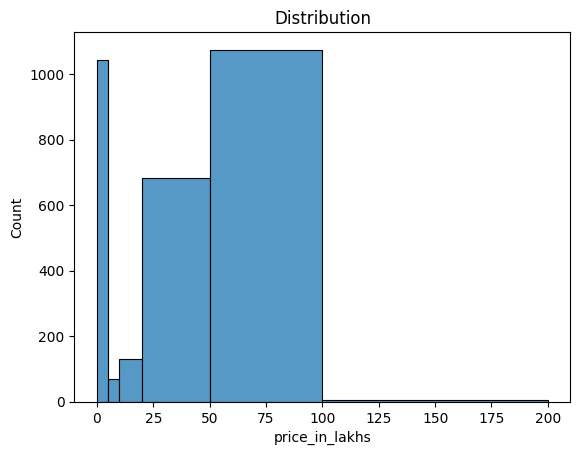

In [184]:
plt.Figure(figsize=(6, 4))
sns.histplot(df["price_in_lakhs"], bins=[0, 5, 10, 20, 50, 100, 200])
plt.title('Distribution')
plt.show()

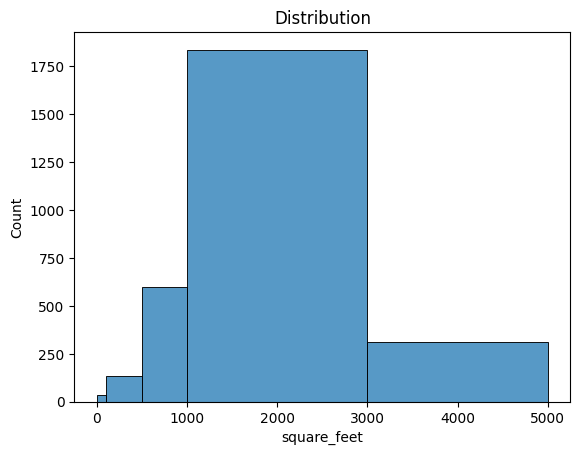

In [185]:
plt.Figure(figsize=(6, 4))
sns.histplot(df["square_feet"], bins=[0, 100, 500, 1000, 3000, 5000])
plt.title('Distribution')
plt.show()

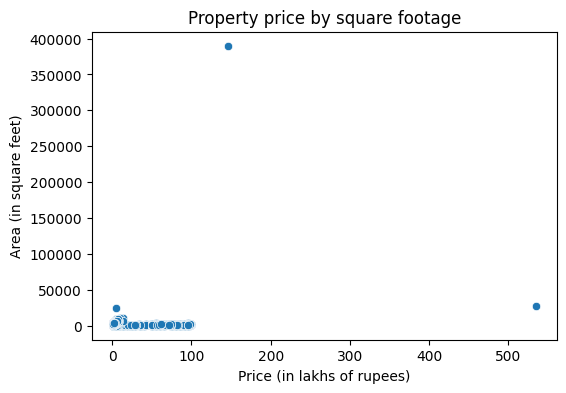

In [186]:
plt.figure(figsize = (6, 4)) 
sns.scatterplot(data = df, x = 'price_in_lakhs', y = 'square_feet') 
plt.title('Property price by square footage') 
plt.xlabel('Price (in lakhs of rupees)') 
plt.ylabel('Area (in square feet)') 
plt.show()

In [187]:
df1 = df.loc[df['square_feet'] < 5000, :]

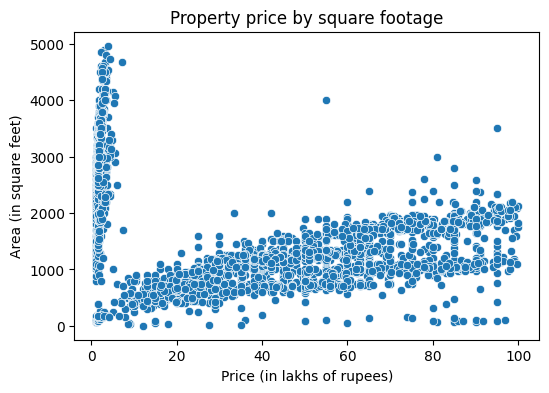

In [188]:
plt.figure(figsize = (6, 4)) 
sns.scatterplot(data = df1, x = 'price_in_lakhs', y = 'square_feet') 
plt.title('Property price by square footage') 
plt.xlabel('Price (in lakhs of rupees)') 
plt.ylabel('Area (in square feet)') 
plt.show()

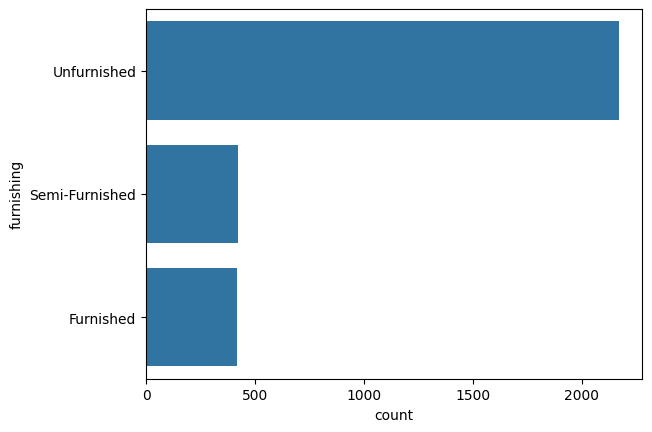

In [189]:
sns.countplot(df['furnishing'])
plt.show()

In [190]:
df.head(2)

,property_name,areaWithType,square_feet,transaction,furnishing,price_per_sqft,floor_num,total_floors,price_in_lakhs
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Unfurnished,"₹2,891 per sqft",5,10,33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Unfurnished,"₹3,551 per sqft",6,14,45.4


In [196]:
df['price_per_sqft'].unique()[:20]

array(['₹2,891 per sqft ', '₹3,551 per sqft ', '₹3,800 per sqft ',
       '₹3,966 per sqft ', '₹3,200 per sqft ', '₹3,235 per sqft ',
       '₹2,315 per sqft ', '₹3,125 per sqft ', '₹5,903 per sqft ',
       '₹2,368 per sqft ', '₹3,185 per sqft ', '₹2,736 per sqft ',
       '₹2,829 per sqft ', '₹3,009 per sqft ', '₹2,857 per sqft ',
       '₹3,325 per sqft ', '₹3,842 per sqft ', '₹3,678 per sqft ',
       '₹3,488 per sqft ', '₹3,282 per sqft '], dtype=object)

In [198]:
# Q1: clean price_per_sqft to make it consume for analysis
df['price_per_sqft'] = df['price_per_sqft'].apply(lambda x: int(x.split(' ')[0].replace('₹', '').replace(',','')))

In [202]:
df['price_per_sqft'].value_counts().iloc[:10].index

Index([5000, 4500, 6000, 5500, 6500, 4000, 3333, 4251, 3500, 7500], dtype='int64', name='price_per_sqft')

In [207]:
df = df[(df["price_per_sqft"].isin(df['price_per_sqft'].value_counts().iloc[:10].index))]

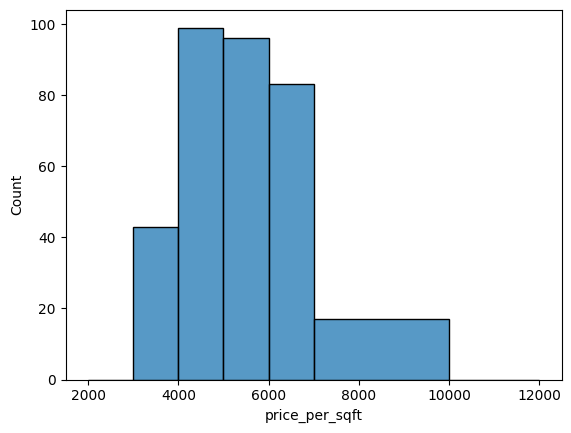

In [209]:
# Q2: analyse price_per_sqft using histplot and scatter with price of the house
plt.Figure(figsize=(6,4))
sns.histplot(df, x='price_per_sqft', bins=[2000,3000,4000,5000,6000,7000,10000,12000])
plt.show()